In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [2]:
case = "MESOCOM"
path = "/glade/scratch/jinmuluo/archive/MESOCOM/lnd/hist/" 
start_date = date(2010, 1, 1)
end_date = date(2012, 1, 1)

# Because out model simulation results are in daily average
# delta_months = (end_date.year - start_date.year)*12 + end_date.month - start_date.month + 1
delta_days = (end_date - start_date).days

In [3]:
NInput = ['MANURE_N_GRZ', 'MANURE_N_BARNS', 'FERT_N_APP', 'NDEP_TO_SMINN', 'NFIX_TO_SMINN', 'FERT_TO_SMINN', 'NITRATE_N_TO_SMINN', 'F_CANOPY_TO_SOIL']
MID_TERM_FAN = ["FERT_NO3_TO_SOIL", "MANURE_NO3_TO_SOIL"]
RUNOFF = ["MANURE_NITRATE_RUNOFF", 'FERT_NITRATE_RUNOFF', "CANOPY_TO_SOIL","FERT_NITRATE_TO_SOIL", "MANURE_NITRATE_TO_SOIL"]
GAS = ["N2O_DENITRIFY_TOTAL", "N2O_NITRIFY_TOTAL", "NOx_DENITRIFY_TOTAL", "NOx_NITRIFY_TOTAL", "N2_TOTAL"]
POOLS = ["NITRATE_TOTN", "NITRATE_G1", "NITRATE_G2", "NITRATE_G3", "NITRATE_S0", "NITRATE_S1", "NITRATE_S2", "NITRATE_S3", "NITRATE_F1", "NITRATE_F2",  "NITRATE_F3",  "NITRATE_F4"]

CLM = []
for i in range(delta_days):
    currdate = start_date + relativedelta(days=i)
    currdate = currdate.strftime('%Y-%m-%d')
    CLM.append(path + case + ".clm2." + "h1" + "." + currdate +"-00000.nc")


In [4]:
def preprocess(ds, fields=GAS):
    return(ds[fields])

dsCLM = xr.open_mfdataset(CLM, decode_times=True, preprocess=preprocess)

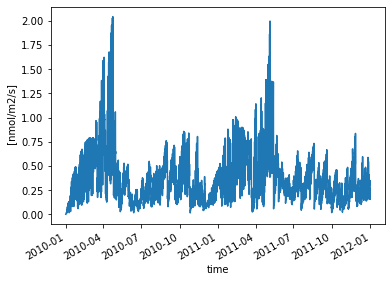

In [16]:
NO = (dsCLM.NOx_NITRIFY_TOTAL + dsCLM.NOx_DENITRIFY_TOTAL)*1e9*30/14
NO.attrs['units'] = "nmol/m2/s"
NO.plot()
plt.show()

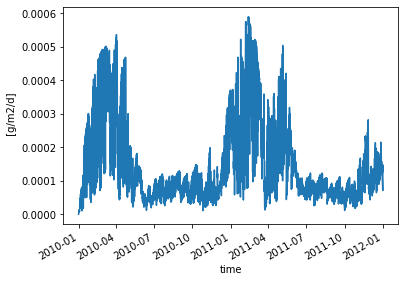

In [18]:
N2O = (dsCLM.N2O_NITRIFY_TOTAL + dsCLM.N2O_DENITRIFY_TOTAL)*54/14*24*3600
N2O.attrs['units'] = "g/m2/d"
N2O.plot()
plt.show()